First subject anatomical nifti image (3D) is at: /home/pierre/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /home/pierre/nilearn_data/haxby2001/subj2/bold.nii.gz


/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: The following kwargs were not used by contour: 'contours'
  im = getattr(ax, type)(data_2d.copy(),


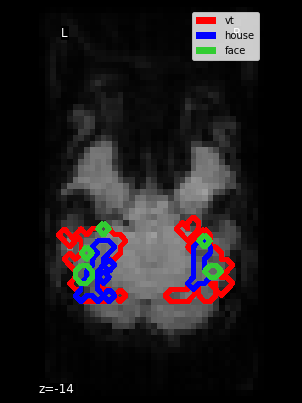

In [1]:
###9.2.11

import matplotlib.pyplot as plt

from nilearn import datasets
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

# Build the mean image because we have no anatomic data
from nilearn import image
func_filename = haxby_dataset.func[0]
mean_img = image.mean_img(func_filename)

z_slice = -14

fig = plt.figure(figsize=(4, 5.4), facecolor='k')

from nilearn.plotting import plot_anat, show
display = plot_anat(mean_img, display_mode='z', cut_coords=[z_slice],
                    figure=fig)
mask_vt_filename = haxby_dataset.mask_vt[0]
mask_house_filename = haxby_dataset.mask_house[0]
mask_face_filename = haxby_dataset.mask_face[0]
display.add_contours(mask_vt_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['red'])
display.add_contours(mask_house_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['blue'])
display.add_contours(mask_face_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['limegreen'])

# We generate a legend using the trick described on
# http://matplotlib.sourceforge.net/users/legend_guide.httpml#using-proxy-artist
from matplotlib.patches import Rectangle
p_v = Rectangle((0, 0), 1, 1, fc="red")
p_h = Rectangle((0, 0), 1, 1, fc="blue")
p_f = Rectangle((0, 0), 1, 1, fc="limegreen")
plt.legend([p_v, p_h, p_f], ["vt", "house", "face"])

show()

In [2]:
###9.2.12

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

from nilearn.surface import surface
from nilearn.plotting import show

In [3]:
N_Z = 5
N_T = 10
u, v = np.mgrid[:N_T, :N_Z]
triangulation = matplotlib.tri.Triangulation(u.flatten(), v.flatten())
angles = u.flatten() * 2 * np.pi / N_T
x, y = np.cos(angles), np.sin(angles)
z = v.flatten() * 2 / N_Z

mesh = [np.asarray([x, y, z]).T, triangulation.triangles]
inner_mesh = [[.7, .7, 1.] * mesh[0], triangulation.triangles]

In [4]:
nested_sample_points = surface._sample_locations_between_surfaces(
    mesh, inner_mesh, np.eye(4))

line_sample_points = surface._line_sample_locations(
    mesh, np.eye(4), segment_half_width=.2, n_points=6)

ball_sample_points = surface._ball_sample_locations(
    mesh, np.eye(4), ball_radius=.15, n_points=20)

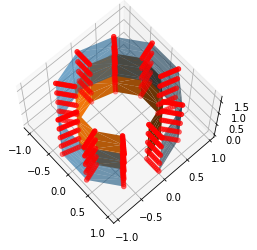

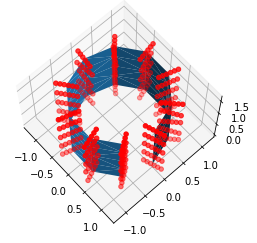

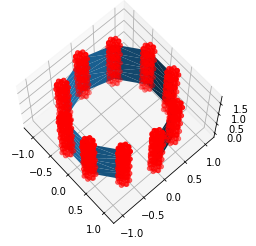

In [5]:
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.view_init(67, -42)
ax.plot_trisurf(x, y, z, triangles=triangulation.triangles, alpha=.6)
ax.plot_trisurf(*inner_mesh[0].T, triangles=triangulation.triangles)
ax.scatter(*nested_sample_points.T, color='r')

for sample_points in [line_sample_points, ball_sample_points]:
    fig = plt.figure()
    ax = plt.subplot(projection='3d')
    ax.view_init(67, -42)
    ax.plot_trisurf(x, y, z, triangles=triangulation.triangles)
    ax.scatter(*sample_points.T, color='r')

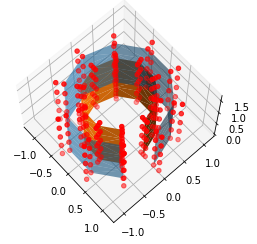

In [6]:
nested_sample_points = surface._sample_locations_between_surfaces(
    mesh, inner_mesh, np.eye(4), depth=[-.5, 0., .8, 1., 1.2])
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.view_init(67, -42)
ax.plot_trisurf(x, y, z, triangles=triangulation.triangles, alpha=.6)
ax.plot_trisurf(*inner_mesh[0].T, triangles=triangulation.triangles)
ax.scatter(*nested_sample_points.T, color='r')

show()